# **Python에서 OpenCV 사용하기**

참고: https://learnopencv.com/getting-started-with-opencv/

## **1. OpenCV 및 관련 라이브러리 가져오기**

- 필요한 라이브러리 가져오기

In [ ]:
import cv2
import numpy as np

- 실습용 데이터 복사하기

In [30]:
# Google Drive Mount
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive
/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file


In [35]:
!cp -rf '/gdrive/My Drive/Resources/' .

In [34]:
!rm -rf ./Resources

## **2. 이미지(정지영상) 파일을 읽고, 표시하고, 저장하기**

- 이미지 읽기, 표시 및 쓰기는 이미지 처리 및 컴퓨터 비전의 기본
- 이미지를 자르거나, 크기를 조정하거나, 회전하거나, 다른 필터를 적용하여 이미지를 처리하는 경우에도 먼저 이미지를 읽어야 함
- 따라서 이러한 기본 작업을 마스터하는 것이 중요함

- 이미지 입출력 관련 함수
    - imread(): 이미지를 읽어옴
    - imshow(): 창에 이미지를 표시함
    - imwrite(): 파일 디렉터리에 이미지를 저장함

### 2-1. 이미지 파일 읽기

- imread(filename, flags)
    - 첫 번째 인수
        - 이미지 이름
        - 파일에 대한 정규화된 경로 필요
    - 두 번째 인수
        - 이미지를 표현하는 방법을 지정할 수 있는 선택적 플래그
        - OpenCV는 이 플래그에 대한 몇 가지 옵션을 제공하지만 가장 일반적인 옵션은 다음과 같음
            - cv2.IMREAD_COLOR (= 1): 이미지를 컬러로 읽음
            - cv2.IMREAD_GRAYSCALE (= 0): 이미지를 그레이스케일로 읽음
            - cv2.IMREAD_UNCHANGED (= -1): 이미지를 변경없이 그대로 읽음

- 참고
    - OpenCV는 BGR 형식의 컬러 이미지를 읽는 반면
    - 대부분의 다른 컴퓨터 비전 라이브러리는 RGB 채널 형식 순서를 사용한다는 점에 유의할 것
    - 다른 툴킷과 함께 OpenCV를 사용할 때 한 라이브러리에서 다른 라이브러리로 전환할 때 파란색과 빨간색 채널을 바꾸어야 함
    - BGR2RGB 함수 사용


In [ ]:
img_color = cv2.imread('./Resources/test.jpg',cv2.IMREAD_COLOR)           # 컬러 이미지로 읽음
img_grayscale = cv2.imread('./Resources/test.jpg',cv2.IMREAD_GRAYSCALE)   # 그레이스케일 이미지로 읽음
img_unchanged = cv2.imread('./Resources/test.jpg',cv2.IMREAD_UNCHANGED)   # 변경없이 그대로 읽음

### 2-2. 이미지 파일 표시하기

- imshow(window_name, image)
    - 첫 번째 인수
        - 창에 표시될 창 이름
        - 한 번에 여러 이미지를 표시하려면 표시할 모든 이미지에 대해 새 창 이름을 지정
    - 두 번째 인수
        - 표시할 이미지

- imshow 함수는 다음의 함수와 함께 사용하도록 설계됨
    - waitKey()
        - 키보드 바인딩 함수
        - 창이 표시되는 시간(밀리초)인 단일 인수를 사용함
        - 사용자가 이 시간 내에 아무 키나 누르면 프로그램이 계속됨
        - 0이 전달되면 프로그램은 키 입력을 무한정 기다림
        - 키보드의 Q 키 또는 ESC 키와 같은 특정 키 입력을 감지하도록 기능을 설정함으로써 어떤 키가 어떤 동작을 트리거할지 보다 명시적으로 알려줄 수 있음
    - destroyAllWindows()
        - 우리가 만든 모든 창을 파괴함
        - destroyAllWindows()를 사용하면 시스템의 주 메모리에서 창이나 이미지도 지워짐
    - destroyWindow()
        - 특정 창을 삭제해야 하는 경우 정확한 창 이름을 인수로 지정함
        - destroyWindows()를 사용하면 시스템의 주 메모리에서 창이나 이미지도 지워짐

- 자체 개발환경에서 사용할 경우
    - 독립적인 IDE(VSCode 등)를 사용할 때: 정상작동함
    - Jupyter Notebook/Lab을 사용할 때: 정상작동함. 그러나 1회 실행된 후부터 작동하지 않는 경우가 있음
        - 새로운 Window를 여는 기능(여기에서는 imshow)이 불안정함

In [ ]:
#cv2.imshow('color image',img_color)
#cv2.imshow('grayscale image',img_grayscale)
#cv2.imshow('unchanged image',img_unchanged)
#cv2.waitKey(0)
#cv2.destroyAllwindows()

- Google Colab에서 개발할 경우
    - imshow 함수가 제대로 호환되지 않음
    - Google Colab에서 제공하는 패치용 함수(cv2_imshow)를 사용할 것

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
cv2_imshow(img_color)       # 컬러 이미지로 표시
cv2_imshow(img_grayscale)   # 그레이스케일 이미지로 표시
cv2_imshow(img_unchanged)   # 변경없이 읽은 그대로 표시

### 2-3. 이미지 파일 저장하기

- imwrite(filename, image)
    - 첫 번째 인수
        - 저장할 파일 이름
        - 파일 이름 확장자(예: .png, .jpg 등)를 포함해야 함
        - OpenCV는 이 파일 이름 확장자를 사용하여 파일 형식을 지정함
    - 두 번째 인수
        - 저장하려는 이미지
        - 이미지가 성공적으로 저장되면 True 값이 반환됨

In [ ]:
cv2.imwrite('./grayscale.jpg',img_grayscale)

True

## **3. 비디오(동영상) 파일을 읽고, 표시하고, 저장하기**

### 3-1. 비디오 파일 읽기

- 비디오(=동영상) 파일을 읽고 쓰는 것은 이미지를 읽고 쓰는 것과 매우 유사함
- 비디오는 프레임이라고 하는 일련의 이미지일 뿐임
- 따라서 비디오 시퀀스의 모든 프레임을 반복한 다음 한 번에 한 프레임씩 처리하기만 하면 됨

- 기본적으로 다음 3가지의 방법을 사용함
    - 파일로부터 읽기
    - 이미지 시퀀스로부터 읽기
    - WebCam으로부터 읽기(= Data Stream으로부터 읽기)

#### 3-1-1. 파일로부터 읽기

- cv2.VideoCapture(path, apiPreference)
    - 비디오를 스트리밍하거나 표시하는 데 도움이 되는 비디오 캡처 개체를 만듦
    - 첫 번째 인수
        - 비디오 파일의 파일 이름/경로
    - 두 번째
        - 기본 설정을 나타내는 선택적 인수


In [ ]:
vid_capture = cv2.VideoCapture('/Resources./CoverCheck.mp4')

- VideoCapture 함수가 제대로 작동했는지 확인하거나 기타 기능을 지원하기 위하여 다음의 함수 등을 사용할 수 있음
    - isOpened()
        - 비디오 파일이 성공적으로 열렸는지 확인할 수 있음
        - 비디오 스트림이 유효한지 여부를 나타내는 부울 값을 반환함(파일, 스트림 모두에 사용 가능)
        - 문제 발생 시, 오류 메시지를 표시함
            - 오류 메시지는 많은 정보를 포함할 수 있음
            - 예: "전체 비디오가 손상되었거나 일부 프레임이 손상되었다" 등
    - get()
        - 비디오 파일이 성공적으로 열렸다고 가정하면 이 방법을 사용하여 비디오 스트림과 관련된 중요한 메타데이터를 검색할 수 있음
        - 이 방법은 웹 카메라에는 적용되지 않음
        - 인수로서 프레임 속도() 및 프레임 수()에 해당하는 숫자 값 또는 이름을 제공할 수 있음
            - CAP_PROP_FPS
            - CAP_PROP_FRAME_COUNT

In [ ]:
if (vid_capture.isOpened() == False):
  print("Error opening the video file")
else:
  fps = vid_capture.get(5)
  print('Frames per second : ', fps,'FPS')

  frame_count = vid_capture.get(7)
  print('Frame count : ', frame_count)

Frames per second :  24.0 FPS
Frame count :  152.0


- vid_capture.read()
    - 비디오 파일과 관련된 원하는 메타데이터를 검색한 후 파일에서 각 이미지 프레임을 읽을 준비가 되었다면
    - 루프를 만들고 메서드를 사용하여 비디오 스트림에서 한 번에 한 프레임씩 읽어서 비디오 읽기를 수행할 수 있음
    - 이 메서드는 튜플을 반환함
        - 첫 번째 요소
            - 부울 값(True/False)
            - True이면 비디오 스트림에 읽을 프레임이 포함되어 있음을 나타냄
        - 두 번째 요소
            - 실제 비디오 프레임
            - 읽을 프레임이 있는 경우, cv2.imshow() 등을 이용하여 창에 현재 프레임을 표시할 수 있음
            - 읽을 프레임이 없는 경우, 루프를 종료

In [ ]:
while(vid_capture.isOpened()):
  ret, frame = vid_capture.read()
  if ret == True:
    cv2_imshow(frame)
    key = cv2.waitKey(20)

    if key == ord('q'):
      break
  else:
    break

- 비디오 스트림이 완전히 처리되거나 사용자가 루프를 중간에 종료하면
    - vid_capture.release()를 호출하여 비디오 캡처 개체()를 해제하고
    - cv2.destroyAllWindows()를 이용하여 창을 닫음

In [ ]:
vid_capture.release()
cv2.destroyAllWindows()

#### 3-1-2. 이미지 시퀀스로부터 읽기

- 이미지 시퀀스에서 이미지 프레임을 처리하는 것은 비디오 스트림에서 프레임을 처리하는 것과 매우 유사함
- 읽고 있는 이미지 파일을 지정하기만 하면 됨

- 예시
    - 비디오 캡처 개체를 계속 사용
    - 단 비디오 파일을 지정하는 대신 이미지 시퀀스를 지정
    - 아래의 예시 코드의 표기법(Cars%04d.jpg)을 사용
        - 여기서 %04d는 0001자리 시퀀스 명명 규칙(예: Cars0002.jpg, Cars0003.jpg, Cars<>.jpg 등)을 나타냄
        - "Race_Cars_%02d.jpg"를 지정한 경우 다음 형식의 파일을 찾을 수 있음
            - Race_Cars_01.jpg, Race_Cars_02.jpg, Race_Cars_03.jpg 등...

In [ ]:
vid_capture = cv2.VideoCapture('./Resources/Image_Sequences/CoverCheck%02d.jpg')

#### 3-1-3. WebCam으로부터 읽기

- 웹 카메라에서 비디오 스트림을 읽는 것도 위에서 설명한 예제와 매우 유사함
    - 시스템에 내장 웹캠이 있는 경우
        - 카메라의 장치 인덱스는 0
    - 시스템에 두 개 이상의 카메라가 연결되어 있는 경우
        - 각 추가 카메라와 연결된 장치 인덱스가 증가(예: 1, 2, ... 등)

- CAP_DSHOW 플래그
    - 선택적 인수이므로 필수가 아님
    - 또 다른 비디오 캡처 API의 기본 설정임
    - 비디오 입력을 통한 directshow의 약자임

- 참고
    - 다양한 입력에 대하여 처리 방법이 매우 유사한 이유
        - OpenCV의 비디오 캡처 클래스의 유연성 덕분
        - 다양한 입력 인수를 허용하는 편의를 위해 여러 오버로드된 함수가 활약 중
        - 비디오 파일 또는 이미지 시퀀스의 원본 위치를 지정하는 대신 비디오 캡처 디바이스 인덱스를 제공하기만 하면 됨


In [ ]:
vid_capture = cv2.VideoCapture(0, cv2.CAP_DSHOW)

### 3-2. 비디오 파일 저장하기

- 비디오 읽기와 마찬가지로 모든 소스(비디오 파일, 이미지 시퀀스 또는 웹캠)에서 가져온 비디오를 작성할 수 있음
- 비디오 파일을 쓰려면 get(), VideoCapture(), VideoWriter()가 필요함

- get()
    - 이미지 프레임의 높이와 너비를 검색
    - 인수(파라미터): 비디오 프레임과 연결된 다양한 메타데이터를 검색할 수 있는 열거형 목록의 단일 인수
        - CAP_PROP_FRAME_WIDTH: 프레임의 너비 검색
        - CAP_PROP_FRAME_HEIGHT: 프레임의 높이 검색
- VideoCapture()
    - VideoCapture 개체(이전 섹션에서 설명한 대로)를 초기화한 후,
    - 앞에서 설명한 소스 중 하나를 사용하여 비디오 스트림을 메모리로 읽어옴

In [ ]:
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))
frame_size = (frame_width,frame_height)
fps = 20

- VideoWriter(filename, apiPreference, fourcc, fps, frameSize[, isColor])
    - VideoWriter 개체를 만든 후, VideoWriter 개체를 사용하여 비디오 스트림을 디스크에 저장함
    - 인수(파라미터)
        - filename: 출력 비디오 파일의 경로 이름
        - apiPreference: API 백엔드 식별자
        - fourcc: 프레임을 압축하는 데 사용되는 코덱의 4자 코드(fourcc)
            - P, I, M, 1 : MPEG-1 Codec
            - M, J, P, G : AVI Codec(Motion-JPEG Codec)
            - *'XVID' : MP4
        - fps: 생성된 비디오 스트림의 프레임 속도
        - frame_size: 비디오 프레임의 크기
        - isColor: 0 또는 다른 값
            - 0이 아닌 경우: 인코더는 색상 프레임을 예상하고 인코딩
            - 0인 경우: 그레이스케일 프레임에서 작동(플래그는 현재 Windows에서만 지원됨)

- 아래 코드의 경우: 초당 20프레임의 속도로 AVI 비디오 파일을 디스크에 저장

In [ ]:
output = cv2.VideoWriter('./output_video_from_file.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 20, frame_size)

In [ ]:
while(vid_capture.isOpened()):
    ret, frame = vid_capture.read()
    if ret == True:
        output.write(frame)
    else:
        print('Stream disconnected')
    break

In [ ]:
vid_capture.release()
output.release()

### 3-3. 비디오 파일을 읽거나 쓸 때 만날 수 있는 오류

#### 3-3-1. 비디오 파일을 읽을때

- 발생하는 상황
    - 경로가 잘못된 경우
    - 파일이 손상된 경우
    - 프레임이 누락된 경우
- 루프 안에 명령문(if구문 등)을 사용하는 이유임
    - 이렇게 하면 프레임이 있을 때만 처리
- 비디오에 잘못된 경로를 제공하면 클래스를 사용하여 오류나 경고가 표시되지 않음
    - 비디오 프레임에서 작업을 수행하려고 할 때 문제가 발생함
    - 간단한 if 블록을 사용하여 예제에서와 같이 비디오 파일을 읽었는지 여부를 확인함으로써 대응할 수 있음

#### 3-3-2. 비디오 파일을 쓸때

- 발생하는 상황
    - 프레임 크기 오류
        - 프레임 크기가 비디오와 유사하지 않으면 출력 디렉토리에 비디오 파일이 있어도 비어 있게 됨
        - NumPy의 Shape 메서드를 사용하여 프레임 크기를 검색하는 경우 OpenCV가 높이 x 너비 x 채널을 반환하므로 출력을 반전시켜야 함
    - API 기본 설정 오류
        - API 기본 설정 오류가 발생하는 경우 인수에 플래그를 전달해야 할 수 있음(CAP_DSHOW 전달되지 않은 경우 등)
        - 경고가 생성되지 않도록 하기 위해 사용하는 웹캠 예제에서 볼 수 있음

## **4. 이미지 크기 변경하기**

### 4-1. 필요한 기본 배경지식

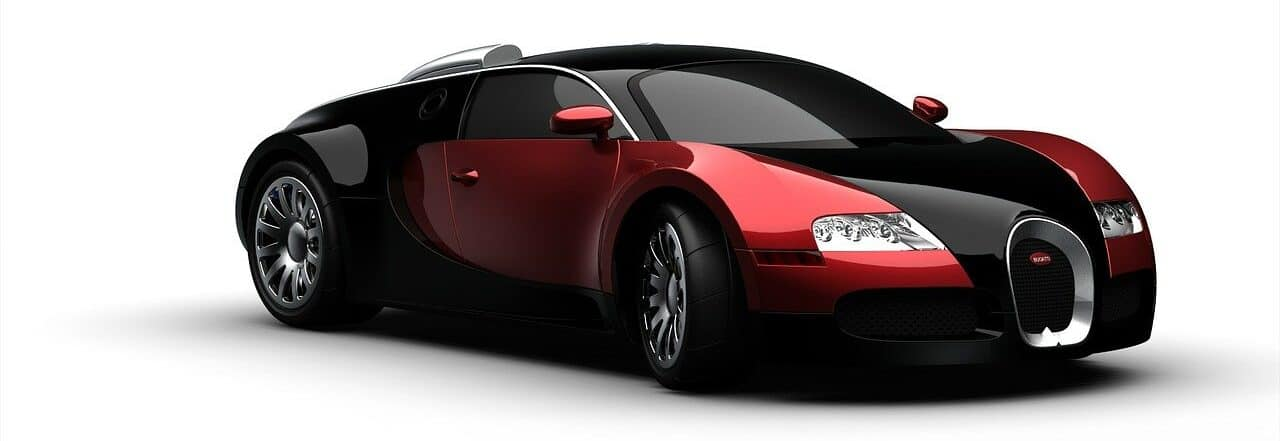

In [ ]:
image = cv2.imread('./Resources/image.jpg')
cv2_imshow(image)

- 이미지 크기 조정을 시작하기 전에 원래 크기를 알아야 함
- 이미지 크기를 가져오려면:
    - shape 메서드 사용
        - 높이, 너비 및 채널 수의 세 가지 값을 반환

    - 위의 결과는 size() 함수를 사용하여 얻을 수도 있음
        - image.size().width : 너비를 반환
        - image.size().height : 높이를 반환

In [ ]:
h,w,c = image.shape
print("Original Height and Width:", h,"x", w)

Original Height and Width: 441 x 1280


- 주의할 점
    - OpenCV: 이미지의 모양을 높이 * 너비 * 채널  형식으로 출력
    - 일부 다른 이미지 처리 라이브러리: 너비, 높이 의 형태로 제공
- 이유
    - OpenCV를 사용하여 이미지를 읽으면 NumPy 배열로 표시됨
    - 따라서 일반적으로 행 * 열 배열의 모양을 (높이를 나타내는 행과 너비를 나타내는 열)의 관점에서 참조함
    - 즉 모양을 얻기 위해 OpenCV로 이미지를 읽을 때도 동일한 NumPy 배열 규칙을 적용함
    - 결국 높이 * 너비 * 채널의 형태로 모양을 얻게 됨

### 4-2. Resize 함수 구문

- resize(src, dsize)
    - 기본적으로 두 개의 입력 인수가 요구됨
    - 필수 파라미터
        - src: 원본 이미지. 필수 입력 이미지이며 입력 이미지의 경로가 있는 문자열이 올 수 있음
        - dsize: 조정하고자 하는 크기. 출력 이미지의 원하는 크기이며 새로운 높이와 너비가 될 수 있음
    - 생략 가능 파라미터
        - dst: 크기가 dsize인 출력 이미지. src와 동일한 유형을 가짐
        - fx: 가로 축을 따르는 축척 비율
        - fy: 세로 축을 따르는 축척 비율
        - interpolation: 보간. 이미지 크기를 조정하는 다양한 방법을 선택할 수 있음


- 예제의 내용(크기 축소)
    - 원하는 너비를 300으로, 원하는 높이를 200으로 설정
    - 이 두 값은 resize() 함수에 필요한 2D 벡터로 결합됨
    - 기본값이 되는 보간 방법을 INTER_LINEAR로 지정

In [ ]:
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

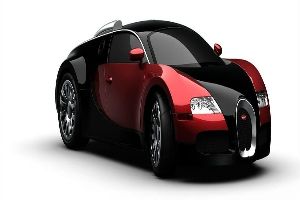

In [ ]:
cv2_imshow(resized_down)
# cv2.waitKey()

- 예제의 내용(크기 확대)
    - 원하는 너비를 600으로, 원하는 높이를 400으로 설정
    - 이 두 값은 resize() 함수에 필요한 2D 벡터로 결합됨
    - 기본값이 되는 보간 방법을 INTER_LINEAR로 지정

In [ ]:
up_width = 600
up_height = 400
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)

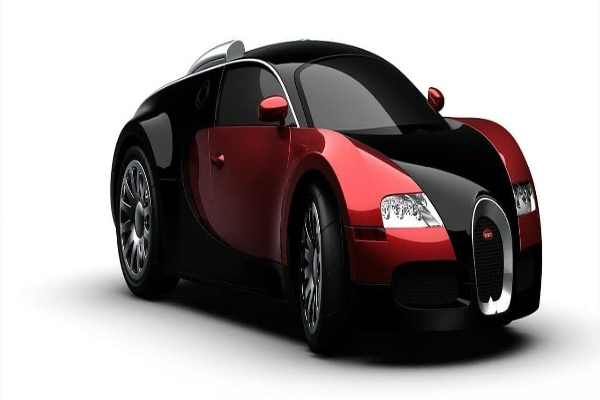

In [ ]:
cv2_imshow(resized_up)
# cv2.waitKey()

In [ ]:
# cv2.destroyAllWindows()

### 4-3. 배율 인수를 사용하여 크기 조정

- 이미지 크기 조정 시 주의할 점
    - 너비와 높이에 대한 명시적 값을 정의하여 크기를 조정하면 결과 이미지가 왜곡됨
    - 즉, 이미지의 종횡비가 그대로 유지되지 않음

- 배율 인수로 이미지 크기 조정하기
    - 배율 인수
        - '스케일링 팩터' 또는 '스케일 팩터'라고도 부름
        - 이미지의 너비와 높이와 같은 일부 수량을 확장하거나 곱하는 숫자
        - 종횡비를 그대로 유지하고 디스플레이 품질을 유지하게 하는 데 도움이 되는 값
    - 배율 인수를 사용하면        
        - 이미지를 확대하거나 축소하는 동안 이미지가 왜곡되어 나타나지 않음

In [ ]:
scale_up_x = 1.2
scale_up_y = 1.2

scale_down = 0.6

scaled_f_down = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(image, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)

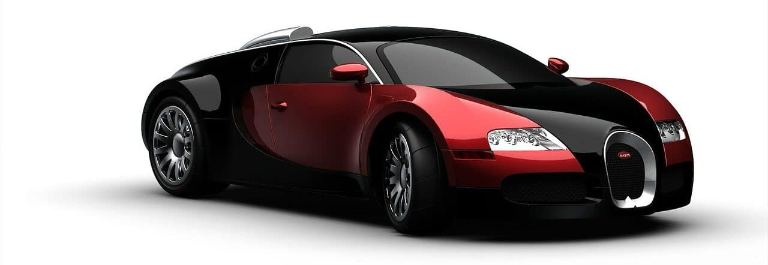

In [ ]:
cv2_imshow(scaled_f_down)
# cv2.waitKey()

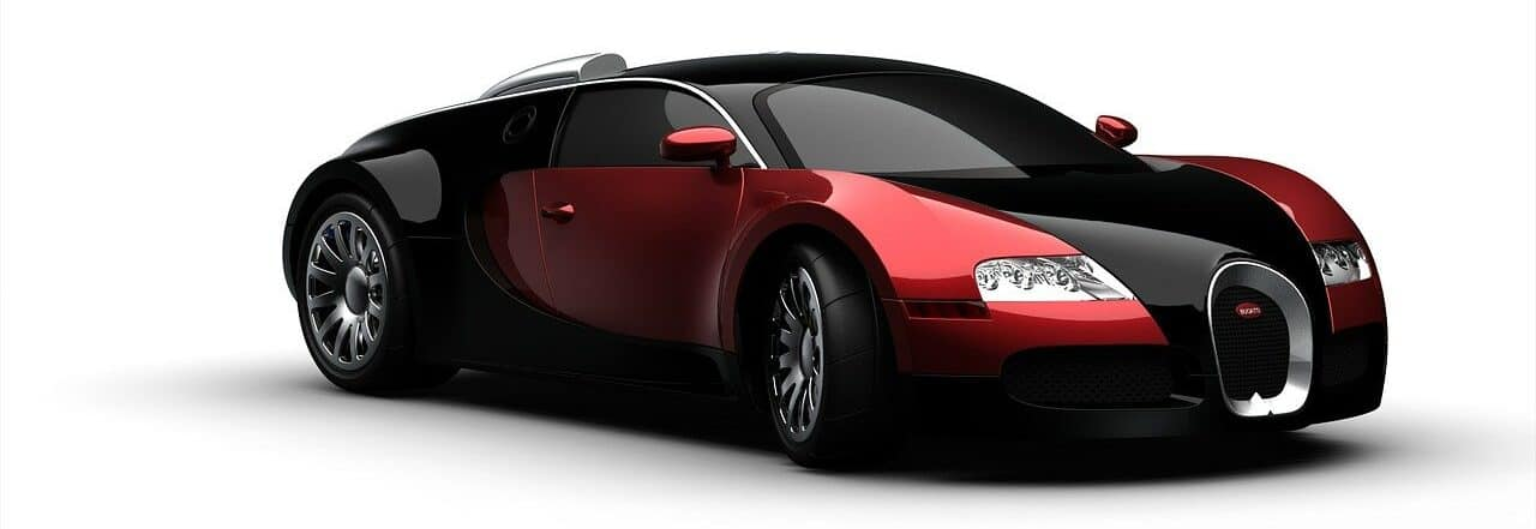

In [ ]:
cv2_imshow(scaled_f_up)
# cv2.waitKey()

### 4-4. 다른 보간 방법으로 크기 조정

- 지원되는 보간 방법의 종류
    - INTER_AREA
        - 리샘플링을 위해 픽셀 영역 관계를 사용함
        - 이미지 크기를 줄이는 데 가장 적합한 방법(축소)
        - 이미지를 확대할 때는 INTER_NEAREST를 주로 사용함
    - INTER_CUBIC
        - 이미지 크기를 조정하기 위해 바이큐빅 보간을 사용함
        - 새 픽셀의 크기를 조정하고 보간하는 동안 이 메서드는 이미지의 인접한 4x4 픽셀에 적용됨
        - 그런 다음 16개 픽셀의 가중치 평균을 사용하여 보간된 새 픽셀을 만듦
    - INTER_LINEAR
        - 이 방법은 INTER_CUBIC 보간과 다소 유사함
        - 그러나 INTER_CUBIC와 달리 2x2개의 인접 픽셀을 사용하여 보간된 픽셀의 가중 평균을 구함
    - INTER_NEAREST
        - 보간을 위해 최근접 이웃 개념을 사용함
        - 이미지에서 하나의 인접 픽셀만 사용하는 가장 간단한 방법 중 하나임

In [ ]:
res_inter_nearest = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_NEAREST)
res_inter_linear = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
res_inter_area = cv2.resize(image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_AREA)

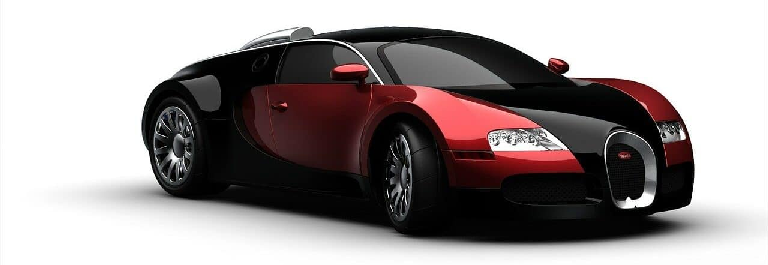

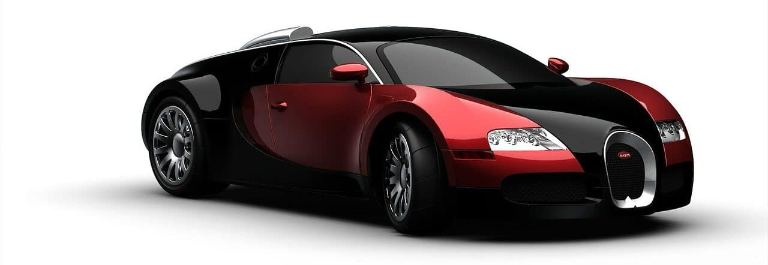

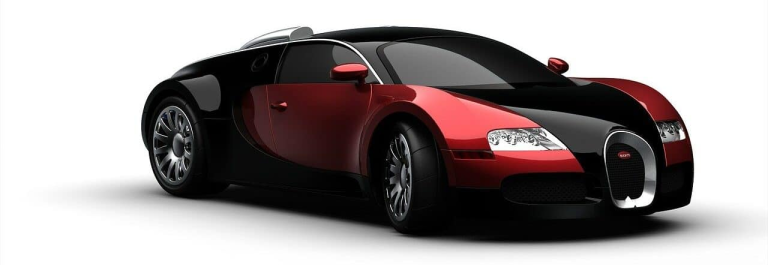

In [ ]:
cv2_imshow(res_inter_nearest)
cv2_imshow(res_inter_linear)
cv2_imshow(res_inter_area)

- 각 보간결과물을 결합해서 출력해보기

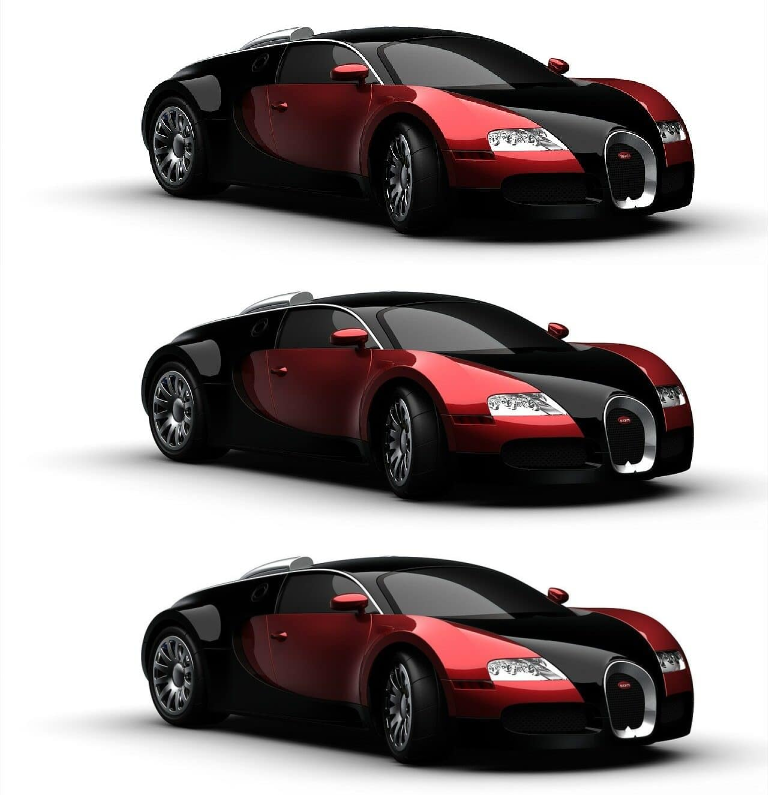

In [ ]:
vertical= np.concatenate((res_inter_nearest, res_inter_linear, res_inter_area), axis = 0)
cv2_imshow(vertical)